# Tarea 1: Activaciones y pasada hacia adelante en una red neuronal <br/> CC6204 Deep Learning, Universidad de Chile  <br/> Hoja de respuestas
## Nombre: 
Fecha de entrega: 2 de octubre de *2020*

In [2]:
!pip install torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html
# Este notebook está pensado para correr en CoLaboratory. 
# Lo único imprescindible por importar es torch 
import torch

# Posiblemenete quieras instalar e importar ipdb para debuggear.
# Si es así, descomenta lo siguiente
# !pip install -q ipdb
# import ipdb

# Aqui instalamos la libreria de correccion del curso
!pip install "git+https://github.com/dccuchile/CC6204.git@master#egg=cc6204&subdirectory=autocorrect"


Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 704.4MB 21kB/s 
     |████████████████████████████████| 6.6MB 61.8MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101
  Cloning https://github.com/dccuchile/CC6204.git (to revision master) to /tmp/pip-install-t6zmrj_2/cc6204
  Running command git clone -q https://github.com/dccuchile/CC6204.git /tmp/pip-install-t6zmrj_2/cc6204
  Created wheel for cc6204: filename=cc6204-0.3.2-cp36-none-any.whl size=4708 sha256=aa5db947c32cf1e65f03a8afe893da81181e1e15771cb86edc89f7b67c60f930
  Stored in directory: /tmp/pip-ephem-wheel-cache-ihuh9g3b/wheels/62/f0/30/aadcb7ce24a2f9c935890518e902d4e23bf97b80f47bb64414
Successfully built cc6204


In [3]:
# importamos las herramientas del curso
from cc6204 import AutoCorrect, FailedTest

# ingresa el host y port que posteamos en u-cursos

corrector = AutoCorrect(host="cc6204.dcc.uchile.cl", port=443)

# anota el token que te daremos en u-cursos

token = "]ye/Ox;nsz"

Connection stablished


# Parte 1: Funciones de activación y función de salida

## 1a) Funciones de activación

In [4]:
def sig(T):
  return torch.reciprocal(1 + torch.exp(-1 * T))

def tanh(T):
  E = torch.exp(T)
  e = torch.exp(-1 * T)
  return (E - e) * torch.reciprocal(E + e)

# Tu código acá
def relu(T):
  zeros=torch.zeros_like(T)
  return torch.where(T>0, T, zeros)

def swish(T, beta ):
  sigmB=torch.reciprocal(1+torch.exp(-1*(T*beta)))
  return T*sigmB

def celu(T, alpha ):
  ELUmod=alpha*(torch.exp(T/alpha)-1)
  return torch.where(T>=0, T, ELUmod)

In [5]:
# correccion
test_relu = corrector.get_test_data(homework=1, question="1a", test=1, token=token)
test_swish, swish_par = corrector.get_test_data(homework=1, question="1a", test=2, token=token)
test_celu, celu_par = corrector.get_test_data(homework=1, question="1a", test=3, token=token)

# probablemente quieras convertr los variables test_* a un tensor, ya que por defecto son listas
test_relu=torch.tensor(test_relu)
test_swish=torch.tensor(test_swish)
test_celu=torch.tensor(test_celu)


corrector.sumbit(homework=1, question="1a", test=1, token=token, answer=relu(test_relu))
corrector.sumbit(homework=1, question="1a", test=2, token=token, answer=swish(test_swish, swish_par))
corrector.sumbit(homework=1, question="1a", test=3, token=token, answer=celu(test_celu, celu_par))

Correct Test!
Correct Test!
Correct Test!


## 1b) Softmax


Sea la secuencia $(x_1-K, ... X_n-K)$ con $K$ un real cualquiera. Tenemos que:

\begin{equation}
s_i' = \frac{e^{x_i-K}}{\sum_{j=1}^{n}e^{x_j-K}} = \frac{e^{x_i-K}}{e^{x_1-K}+e^{x_2-K}+\ldots+e^{x_i-K}+\ldots +e^{x_n-K}}
\end{equation}
\
\begin{equation}
=\frac{e^{-K}\cdot e^{x_i}}{e^{-K}(e^{x_1}+e^{x_2}+\ldots+e^{x_i}+\ldots +e^{x_n})}
\end{equation}
\
\begin{equation}
=\frac{e^{x_i}}{(e^{x_1}+e^{x_2}+\ldots+e^{x_i}+\ldots +e^{x_n})}
\end{equation}
\
\begin{equation}
=s_i
\end{equation}
Dado que la construcción es la misma para todos los $s_i$ y que $K$, tenemos el resultado buscado: La secuencia de salida $(s_1, \ldots, s_n)$ no varía al restarle un mismo valor a cada elemento de la secuencia de entrada $(x_1, \ldots, x_n)$.



In [6]:
# Tu código acá

def softmax(T, dim, estable=True):
  # Los valores a restar serán los máximos de dim, para disminuir tanto 
  # como podamos las exponenciales (dejando una en 0 exp(0)). 
  if estable: 
    max_val=torch.max(T, dim, keepdim=True)[0] # [0] para recuperar el valor y no el indice.
    exp_T = torch.exp(T-max_val) # Aplicamos exponencial a cada entrada
  else: # No aplicamos la reducción de exponenciales
    exp_T = torch.exp(T) 
  exp_sum = torch.sum(exp_T, dim, keepdim=True, dtype=torch.double) # Calculamos el divisor
  return exp_T*torch.reciprocal(exp_sum)


In [7]:
test_softmax, _dim = corrector.get_test_data(homework=1, question="1b", test=1, token=token)
test_softmax=torch.tensor(test_softmax)
corrector.sumbit(homework=1, question="1b", test=1, token=token, answer=softmax(test_softmax, dim=_dim))

Correct Test!


# Parte 2: Red neuronal y pasada hacia adelante (forward)

## 2a) Clase para red neuronal, 2b) Iterando por parametros, 2d) Pasada hacia adelante

In [28]:
class FFNN(torch.nn.Module):
  def __init__(self, F, l_h, l_a, C, alphacelu=1, betaswish=1):
    super(FFNN, self).__init__()
    #Entrada
    self.entry = torch.nn.Parameter(torch.rand(F, l_h[0]))
    #Capas ocultas y sus pesos
    self.hiddens = torch.nn.ParameterList([torch.nn.Parameter(torch.rand(l_h[i], l_h[i+1])) for i in range(0, len(l_h)-1)])
    self.hiddens.append(torch.nn.Parameter(torch.rand(l_h[len(l_h)-1], C)))
    #Sesgos 
    self.bias = torch.nn.ParameterList([torch.nn.Parameter(torch.zeros(l_h[i])) for i in range(0, len(l_h))])
    #Funciones de activacion
    self.activations = l_a
    #Salida
    self.U = torch.nn.Parameter(torch.rand(l_h[len(l_h)-1], C))
    self.c = torch.nn.Parameter(torch.rand(1, C))
    #Parametros opcionales
    self.alphacelu = alphacelu
    self.betaswish = betaswish
  
  #Setters de los distintos parametros
  def setU(self, UTensor):
    self.U = torch.nn.Parameter(UTensor)

  def setC (self, outTensor):
    self.c = torch.nn.Parameter(outTensor)

  def setEntry (self, entryTensor):
    self.entry = torch.nn.Parameter(entryTensor)
  
  # Dos posibilidades: se busca modificar W de una capa especifica o
  # se desea modificar toda la lista de tensores de capa oculta.
  def setHiddens(self, newHiddens, index=-1):
    if index!= -1 and newHiddens!=None:
      self.hiddens[index] = torch.nn.Parameter(newHiddens)
    else:
      self.hiddens = torch.nn.ParameterList(newHiddens)
  
  # Dos posibilidades: se busca modificar la activación de una capa especifica o
  # se desea modificar toda la lista de activaciones
  def setActivations(self, newActivations, index=-1):
      if index!= -1 and newActivations!=None:
        self.activations[index] = newActivations
      else:
        self.activations = newActivations

  # Dos posibilidades: se busca modificar el bias de una capa especifica o
  # se desea modificar toda la lista de tensores de bias
  def setBias(self, bias, index =-1):
    if index!= -1:
      self.bias[index]=torch.nn.Parameter(bias)
    else:
      self.bias = torch.nn.ParameterList(bias)

  def setAlphaCelu(alpha):
    self.alphacelu = torch.nn.Parameter(alpha)
  
  def setBetaSwish(beta):
    self.betaswish = torch.nn.Parameter(beta)
  
  def resumen(self):
    for name, param in self.named_parameters():
     print ("Parámetro: "+name+". Dimensiones: "+param.size())

  #Funcion forward con softmax en la primera dimensión.
  def forward(self, x):
    #Entrada
    h = self.activations[0](x.mm(self.entry)+self.bias[0])
    #Ocultas
    for i in range (0, len(self.hiddens)-1):
      h = self.activations[i+1](h.mm(self.hiddens[i])+self.bias[i+1])
    #Salida
    y = softmax(h.mm(self.U) + self.c,1)
    return y

## 2c) Moviendo los parámetros entre dispositivos

In [29]:
# Tu código acá
red_neuronal_test = FFNN(20000, [300, 500], [relu, sig], 200)
red_neuronal_test.to('cuda')
!nvidia-smi

Fri Oct  2 23:51:29 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    31W /  70W |    815MiB / 15079MiB |      1%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Parte 3: Probando tu red con parámetros pre-entrenados para MNIST

In [30]:
# Importamos MNIST desde torchvision.
from torchvision.datasets import MNIST 

# Importamos una función para convertir imágenes en tensores.
from torchvision.transforms import ToTensor

# Importamos funcionalidades útiles para mirar los datos.
from matplotlib.pyplot import subplots
from random import randint

# Descarga y almacena el conjunto de prueba de MNIST.
dataset = MNIST('mnist', train=False, transform=ToTensor(), download=True)
print('Cantidad total de datos:',len(dataset))

Cantidad total de datos: 10000


## 3b) Cargando los parámetros pre-entrenados

In [31]:
from numpy import loadtxt
#Carga en memoria de los parametros. Deben estar en el directorio actual.
W1 = torch.from_numpy(loadtxt('W1.txt')).float()
W2 = torch.from_numpy(loadtxt('W2.txt')).float()
b1 = torch.from_numpy(loadtxt('b1.txt')).float()
b2 = torch.from_numpy(loadtxt('b2.txt')).float()
c = torch.from_numpy(loadtxt('c.txt')).float()
U = torch.from_numpy(loadtxt('U.txt')).float()


#Asignación de parametros a red neuronal mediante setters
red_neuronal = FFNN(784, [32, 16], [relu, relu], 10)
red_neuronal.setEntry(W1)
red_neuronal.setHiddens(W2,0)
red_neuronal.setBias(b1, 0)
red_neuronal.setBias(b2, 1)
red_neuronal.setU(U)
red_neuronal.setC(c)

## 3c) Cálcula la predicción de un ejemplo al azar

Clase real: 3
Clase según FFNN: 3


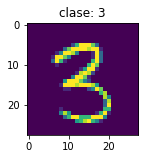

In [32]:
import random

# Llamado a un dato aleatorio del dataset y despliegue de imagen  
n_ejemplos = 1
fig, ax = subplots(nrows=n_ejemplos , figsize=(2,n_ejemplos*3))
idx = random.randint(0,len(dataset))
T, l = dataset[idx] 
img = T.view(28,28).numpy()
ax.set_title("clase: "+ str(l))
ax.imshow(img)

# Transformación de la imagen a dimensión 1-N (columna) y pasada por la FFNN
y = red_neuronal.forward(T.view(1,784))

# Despliegue de resultados
#print("Tensor de probabilidades resultante: \n" + str(y) + "\n")
valor, max = y.max(1)
print("Clase real: " + str(l))
print("Clase según FFNN: " + str(max.tolist()[0]))


## 3d) Pasando todos los ejemplos por la red con un `DataLoader`

In [33]:
import time
from torch.utils.data import DataLoader
def calcula_acierto(red, dataset, batch_size=100, device='cuda'):
  tiempo=time.time()
  dataloader = DataLoader(dataset, batch_size)
  evaluados=0
  correctos=0
  red=red.to(device)

  for x,y in dataloader:
    x=x.to(device)
    y=y.to(device)
    x=x.view(batch_size,28,28)
    for i in range (len(x)):
      entrada=x[i]
      resultado = red.forward(entrada.view(1,784))
      valor, indice = resultado.max(1)
      if indice == y[i]:
        correctos+=1
      evaluados+=1
      
  #Mostrar tasa de acierto y tiempo de procesamiento
  print("Tasa de acierto: "+str(round(correctos/evaluados, 3)*100)+"%")
  print("Tiempo utilizado en "+device+": "+ str(time.time()-tiempo))
  return correctos/evaluados

calcula_acierto(red_neuronal, dataset, device='cuda')
calcula_acierto(red_neuronal, dataset, device='cpu')



Tasa de acierto: 96.1%
Tiempo utilizado en cuda: 5.510158061981201
Tasa de acierto: 96.1%
Tiempo utilizado en cpu: 3.1785285472869873


0.9612

Curiosamente, estamos obteniendo un tiempo de procesamiento $t$ tal que
$t(cuda)=2*t(cpu)$. Desconocemos el motivo de esto, pero imaginamos que quizá el hecho de pasar los tensores a un dispositivo toma cierto tiempo que para datasets grandes y en donde se realiza un gran número de operaciones es despreciable, pero para este caso no lo es.



### Correccion red

In [34]:
from torch.utils.data import Subset
indices = corrector.get_test_data(homework=1, question="network", test=1, token=token)
test_set = Subset(dataset, indices)


In [35]:
from torch.utils.data import DataLoader

#Seteamos el device en el que queremos trabajar
device='cuda'
your_network = red_neuronal.to(device)

#Cargamos el dataloader con todos los datos en un solo batch
from torch.utils.data import DataLoader
dataloader = DataLoader(test_set, len(test_set))

#Pasamos el batch por la red
for x,y in dataloader:
  x=x.view(-1,784)
  x=x.to(device)
  y=y.to(device)
  probabilidades = your_network(x).argmax(1)

result = probabilidades

corrector.sumbit(homework=1, question="network", test=1, token=token, answer=result)

Correct Test!


## 3e) Opcional: Muestra los casos en donde la red se equivoca

Imagen nº0: Valor real: 9. Predicción: 3.
Imagen nº1: Valor real: 5. Predicción: 6.
Imagen nº2: Valor real: 7. Predicción: 9.
Imagen nº3: Valor real: 8. Predicción: 1.
Imagen nº4: Valor real: 5. Predicción: 4.


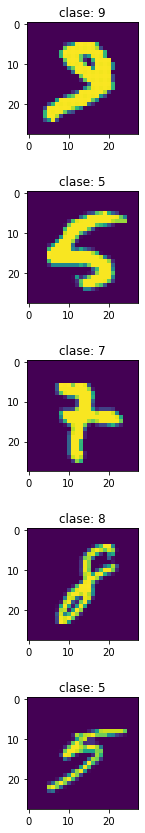

In [36]:
import random
device='cpu'
red_neuronal = red_neuronal.to(device)
# Llamado a datos aleatorios del dataset 

n_ejemplos = 5
fig, axs = subplots(nrows=n_ejemplos, figsize=(2,n_ejemplos*3))

i=0
while i < n_ejemplos:  
  idx = random.randint(0,len(dataset)-1)
  T, l = dataset[idx]
  img = T.view(28,28).numpy()
  T = T.to(device)
  
  # Transformación de la imagen a dimensión 1-N (columna) y pasada por la FFNN
  y = red_neuronal.forward(T.view(1,784))

  # Analisis de resultados
  valor, max = y.max(1)

  if max.tolist()[0]!=l:
    axs[i].set_title("clase: "+ str(l))
    axs[i].imshow(img)
    print("Imagen nº"+ str(i) +": Valor real: " + str(l) +". Predicción: " + str(max.tolist()[0])+"." )
    i+=1

# Es razonable el error que se comete?

###### Según lo observando iterando un par de veces el bloque de código anterior, el error cometido es bastante razonable la mayoría del tiempo, pues se corresponde con números escritos en una forma ''poco común'' (por ejemplo, el 4 que se forma de triángulo y un ''palito'', con respecto al 4 formado por ''3 palitos'', que es más frecuente en el dataset) o bien se trata de verdaderas aberraciones de números. 

###### De todas formas, hay que admitir también que se le pasan algunos números ''fáciles'', pero la frecuencia de esto es aparentemente bastante más  baja.



3f) Opcional: Crea tus propios ejemplos de dígitos para clasificar

In [ ]:
# Acá tu código